In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import image_dataset_from_directory

In [2]:
directory = "D:\\datasets\\Men vs Women\\New folder\\Male and Female face dataset"
data = []
categories = ['Female Faces', 'Male Faces']

for category in categories:
    path = os.path.join(directory, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        labels = categories.index(category)
        arr = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
        new_arr = cv2.resize(arr, (164,164))
        data.append([new_arr, labels])

1


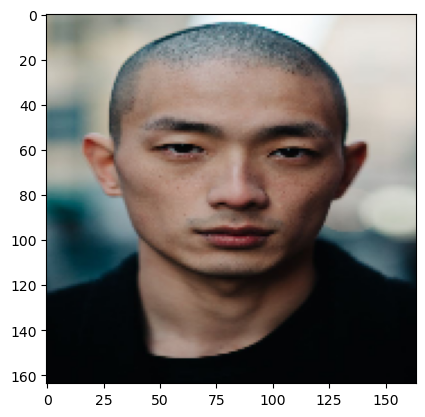

In [3]:
print(data[3501][1])
plt.imshow(data[3501][0]);

In [4]:
X = []
y = []

for feature, label in data:
    X.append(feature)
    y.append(label)

In [5]:
X = np.array(X)
y = np.array(y)

In [6]:
X = X/255

In [7]:
X.shape

(5418, 164, 164, 3)

In [8]:
y.shape

(5418,)

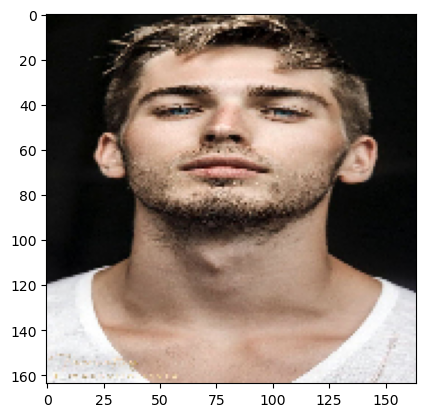

In [9]:
plt.imshow(X[5009])

In [10]:
model = Sequential([
    Conv2D(64,(3,3), input_shape=(164,164,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.20),
    Dense(256, activation='relu'),
    Dropout(0.20),
    Dense(1, activation='sigmoid')
])

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(X,y, epochs=5, validation_split=0.20)

Epoch 1/5
136/136 [==============================] - 357s 3s/step - loss: 0.6026 - accuracy: 0.6910 - val_loss: 0.7634 - val_accuracy: 0.5821
Epoch 2/5
136/136 [==============================] - 349s 3s/step - loss: 0.3920 - accuracy: 0.8311 - val_loss: 0.2960 - val_accuracy: 0.8672
Epoch 3/5
136/136 [==============================] - 350s 3s/step - loss: 0.1850 - accuracy: 0.9282 - val_loss: 0.1518 - val_accuracy: 0.9336
Epoch 4/5
136/136 [==============================] - 349s 3s/step - loss: 0.0851 - accuracy: 0.9698 - val_loss: 0.1115 - val_accuracy: 0.9613
Epoch 5/5
136/136 [==============================] - 351s 3s/step - loss: 0.0442 - accuracy: 0.9836 - val_loss: 0.0670 - val_accuracy: 0.9797


In [13]:
model.save("GenderClassification.h5")
model.save_weights("GenderClassification_Weights.h5")

In [14]:
from tensorflow import keras

def predict_img(img_loc):
    img = cv2.cvtColor(cv2.imread(img_loc), cv2.COLOR_BGR2RGB)#cv2.imread(img_loc)
    img = cv2.resize(img,(164,164))
    test_input = img.reshape(1,164,164,3)
    model = keras.models.load_model("GenderClassification.h5")
    prediction = model.predict(test_input)
    plt.imshow(img)
    if prediction == 0:
        print(f"Model Predicted: {'Female'}")
    else:
        print(f"Model Predicted: {'Male'}")

1/1 [==============================] - 0s 132ms/step
Model Predicted: Male


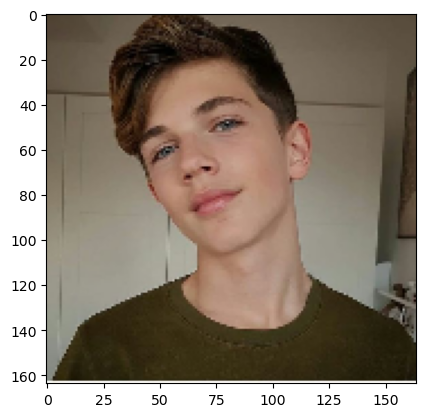

In [17]:
predict_img("C:\\Users\\hashi\\OneDrive\\Desktop\\ai\\900758c570ff53a66ca1bb10edd19e7f.jpg")